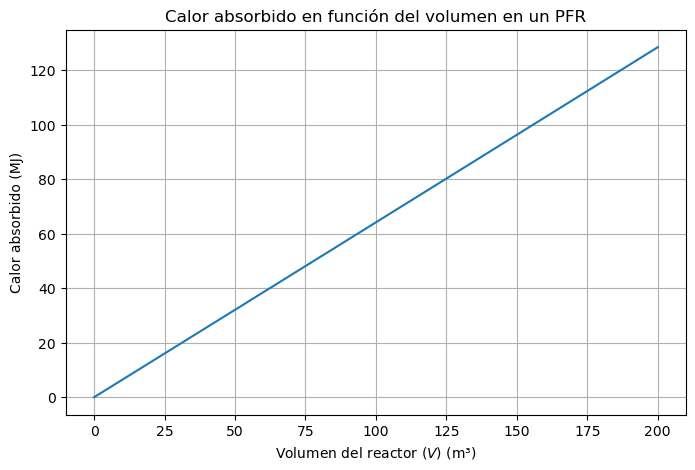

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Datos de las reacciones
dH_f0 = np.array([172.459, 131.293, 74.81])  # kJ/mol
vi = np.array([1.0, 1.0, -1.0])  # Coeficientes estequiométricos

# Datos del reactor PFR
FA0 = 1.0  # Flujo molar inicial del reactivo (mol/s)
Cp = 15  # Capacidad calorífica promedio (J/mol·K)
U = 500  # Coeficiente global de transferencia de calor (W/m²·K)
A = 40  # Área de transferencia de calor (m²)
T0 = 298  # Temperatura del ambiente (K)
T = 1100  # Temperatura del reactor (K)
V_span = (0, 200)  # Volumen del reactor (m³)

# Ecuación diferencial para el calor en un PFR
def dQ_dV(V, Q, FA0, dH_f0, vi, U, A, T, T0):
    x = V / FA0  # Conversión como función del volumen
    dQ_dV = np.sum(vi * dH_f0 * (FA0 - FA0 * x)) - U * A * (T - T0)  # Balance de energía
    return dQ_dV

# Intervalo de integración
V_eval = np.linspace(V_span[0], V_span[1], 100)

# Resolver la ecuación diferencial
sol = solve_ivp(dQ_dV, V_span, [0], args=(FA0, dH_f0, vi, U, A, T, T0), t_eval=V_eval)

# Graficar Q vs V
plt.figure(figsize=(8, 5))
plt.plot(sol.t, -sol.y[0]/2.5e7, label="Calor absorbido ($Q$)")
plt.xlabel("Volumen del reactor ($V$) (m³)")
plt.ylabel("Calor absorbido (MJ)")
plt.title("Calor absorbido en función del volumen en un PFR")
#plt.legend()
plt.grid()
plt.show()
